<a href="https://colab.research.google.com/github/SergeiVorobev/Assets-price-analysis-project-python-/blob/master/AssetsPricePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program predicts the closing assets price using artifitial recurrent neural network 
#   called Long Sort Term Memory(LSTM) with the 60 day assets price.


In [ ]:
import math
import pandas_datareader as prd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the price
df = prd.DataReader('TSLA', data_source='yahoo', start='2014-01-01', end='2020-09-04')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,30.496000,29.309999,29.959999,30.020000,30942000.0,30.020000
2014-01-03,30.438000,29.719999,30.000000,29.912001,23475000.0,29.912001
2014-01-06,30.080000,29.048000,30.000000,29.400000,26805500.0,29.400000
2014-01-07,30.080000,29.049999,29.524000,29.872000,25170500.0,29.872000
2014-01-08,30.740000,29.752001,29.770000,30.256001,30816000.0,30.256001
...,...,...,...,...,...,...
2020-08-31,500.140015,440.109985,444.609985,498.320007,118374400.0,498.320007
2020-09-01,502.489990,470.510010,502.140015,475.049988,90119400.0,475.049988
2020-09-02,479.040009,405.119995,478.989990,447.369995,96176100.0,447.369995


In [ ]:
# Get the number of rows and columns in tehe data
df.shape

(1682, 6)

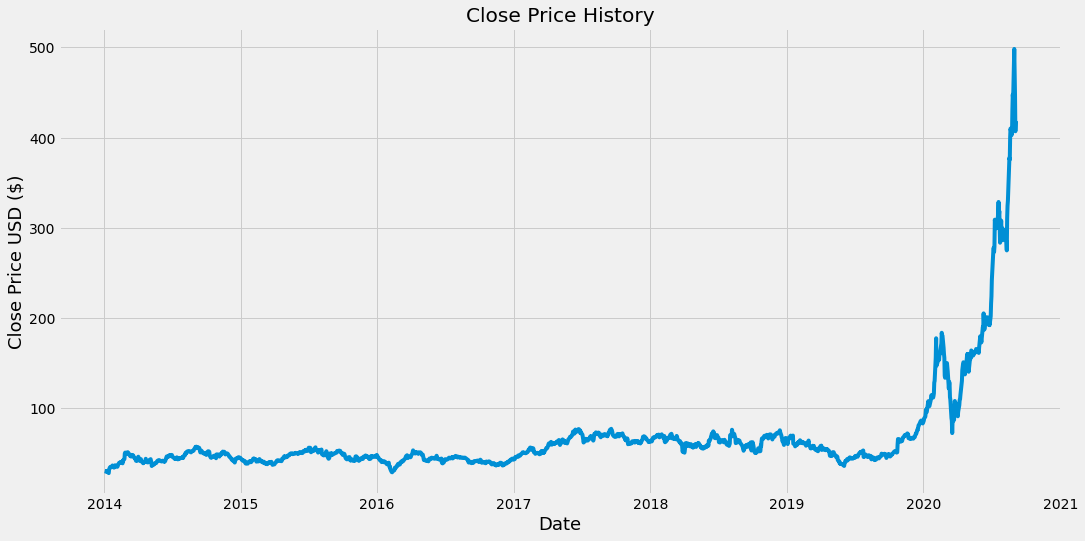

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the  'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to the train the model on
training_data_len = math.ceil(len(dataset) * .8 )
training_data_len

1346

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00457433],
       [0.00434476],
       [0.00325644],
       ...,
       [0.89169987],
       [0.80588879],
       [0.82995077]])

In [ ]:
# Create the training data set
# Create the scaler training data set
train_data =scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00457433, 0.00434476, 0.00325644, 0.00425973, 0.00507597,
       0.00348176, 0.00271228, 0.        , 0.00932295, 0.0105388 ,
       0.01344664, 0.01303852, 0.01587409, 0.01667333, 0.01792319,
       0.01498984, 0.01287273, 0.0165968 , 0.01525767, 0.01849286,
       0.01788493, 0.0160569 , 0.01674559, 0.01491331, 0.0165968 ,
       0.02006156, 0.02432554, 0.02435105, 0.02379839, 0.02563067,
       0.0250355 , 0.02736092, 0.02308418, 0.03002644, 0.02986914,
       0.03329138, 0.04619387, 0.04831948, 0.04812393, 0.04483773,
       0.04728219, 0.04910171, 0.04817495, 0.04829398, 0.0454329 ,
       0.04229975, 0.04041645, 0.04342632, 0.04185336, 0.03895403,
       0.04023365, 0.04280989, 0.04102437, 0.04062901, 0.03806977,
       0.0343627 , 0.03447748, 0.03129756, 0.02889987, 0.03104674])]
[0.02938025214453467]

[array([0.00457433, 0.00434476, 0.00325644, 0.00425973, 0.00507597,
       0.00348176, 0.00271228, 0.        , 0.00932295, 0.0105388 ,
       0.01344664, 0.01303852, 0.01

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1286, 60, 1)

In [ ]:
# Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1286/1286 [==============================] - 26s 20ms/step - loss: 7.9075e-05


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1286 to 1586
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)


In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

11.480655057089669

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


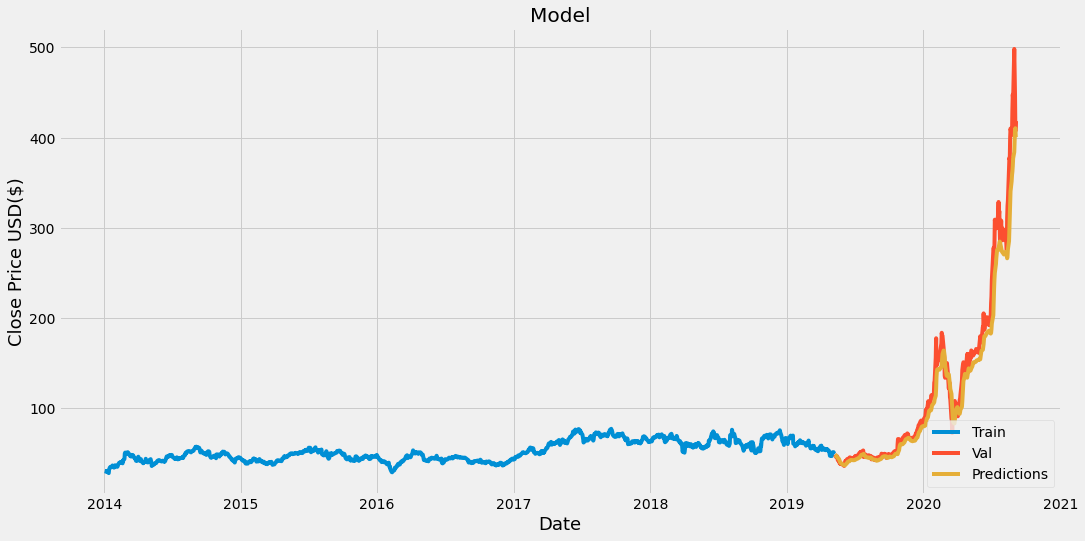

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-05-09,48.396000,47.976673
2019-05-10,47.903999,47.731228
2019-05-13,45.402000,47.300079
2019-05-14,46.462002,46.395771
2019-05-15,46.389999,45.656109
...,...,...
2020-08-31,498.320007,383.897003
2020-09-01,475.049988,398.579071
2020-09-02,447.369995,408.931274


In [ ]:
# Get the quote
tsla_quote = prd.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2020-09-03')
# Create a new dataframe
new_df = tsla_quote.filter(['Close'])
# GEt the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[400.55698]]


In [ ]:
# Get the quote
tsla_quote2 = prd.DataReader('TSLA', data_source='yahoo', start='2020-09-03', end='2020-09-04')
print(tsla_quote2['Close'])

Date
2020-09-03    407.000000
2020-09-04    418.320007
Name: Close, dtype: float64
